     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 123.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

--- Tabela de Qualidade do Dia (Ponderada por Distinção de Voz) ---
| dia_semana    |   qualidade_dia |
|:--------------|----------------:|
| Domingo       |            3.24 |
| Segunda-feira |            1.66 |
| Terça-feira   |            2.82 |
| Quarta-feira  |            2.25 |
| Quinta-feira  |            3.06 |
| Sexta-feira   |            2.98 |
| Sábado        |            4.6  |


/tmp/ipython-input-3501856101.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_semana', y='qualidade_dia', data=pontuacao_diaria, palette='viridis')



Gráfico 'qualidade_dia_idoso_atualizado.png' gerado com sucesso.

Dados salvos em 'monitoramento_idoso_dados_atualizado.csv'.


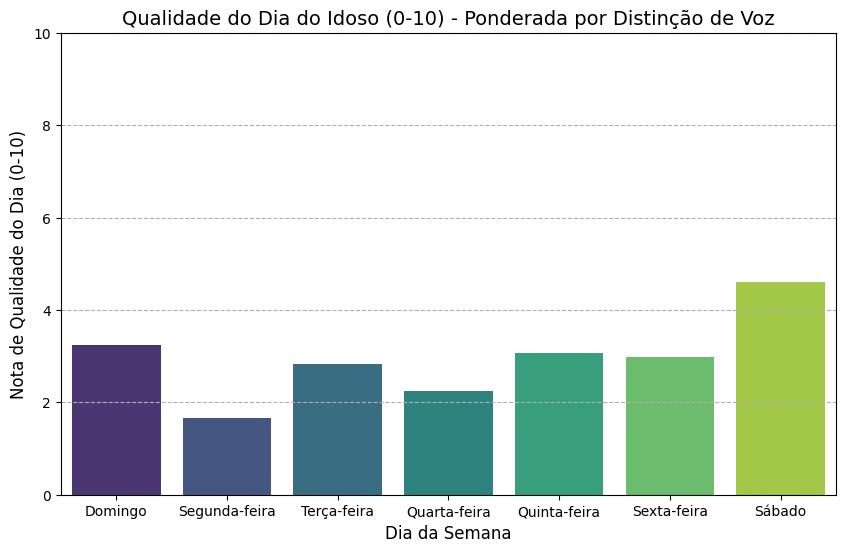

In [1]:
# Instalação e Configuração (Manter para compatibilidade)
# Se estiver em um ambiente Jupyter/Colab, execute as linhas abaixo:
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install torch # Adicionando PyTorch para a simulação com tensores

import pandas as pd
import spacy
import random
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch # Importação do PyTorch para a simulação de tensores

# --- 1. Simulação de Dados ---

# Lista de frases com sentimentos variados para simular o dia a dia
frases_positivas = [
    "O sol está tão bonito hoje, me sinto revigorado.",
    "Tomei meu café da manhã preferido, estava delicioso!",
    "Recebi uma visita que me deixou muito feliz.",
    "Consegui caminhar um pouco mais hoje, que bom.",
    "A novela da tarde está ótima, dei boas risadas.",
    "O almoço de hoje estava uma delícia, a cozinheira se superou.",
    "Lembrei de uma história engraçada da minha juventude.",
    "Meus netos me ligaram, que alegria!",
    "Estou me sentindo muito bem e sem dores.",
    "Terminei de ler um livro muito interessante.",
    "A música que estava tocando no rádio me acalmou.",
    "Hoje o dia foi produtivo e tranquilo.",
    "Agradeço por mais um dia de paz.",
    "Estou ansioso para o jantar.",
    "A enfermeira foi muito atenciosa comigo hoje.",
    "Adoro o cheiro de chuva que está vindo.",
    "Consegui resolver aquele pequeno problema que me incomodava.",
    "Sinto que estou melhorando a cada dia.",
    "É bom ter a família por perto.",
    "Que dia maravilhoso, cheio de boas notícias."
]

frases_neutras = [
    "Acordei na hora de sempre.",
    "Tomei meus remédios conforme a prescrição.",
    "O tempo está nublado, nem frio nem calor.",
    "Assisti ao jornal da manhã.",
    "Comi um pão com manteiga no lanche.",
    "Passei a tarde descansando na poltrona.",
    "Acho que vou dormir cedo hoje.",
    "A televisão está ligada, mas não estou prestando muita atenção.",
    "Preciso pedir para arrumar a lâmpada do corredor.",
    "O dia passou rápido.",
    "A rotina é sempre a mesma.",
    "Não aconteceu nada de especial hoje.",
    "Fiz as tarefas que precisava fazer.",
    "A água do banho estava na temperatura certa.",
    "O carteiro entregou a correspondência."
]

frases_negativas = [
    "Estou com uma dorzinha chata nas costas.",
    "Sinto falta de mais movimento, estou entediado.",
    "Acho que esqueci de tomar um dos meus remédios.",
    "O barulho da rua está me incomodando muito.",
    "Não dormi muito bem esta noite.",
    "A comida estava um pouco sem sal hoje.",
    "Me sinto um pouco sozinho.",
    "Estou preocupado com as contas que precisam ser pagas.",
    "Acho que vou ficar doente.",
    "Não gosto quando chove assim.",
    "A televisão não está funcionando direito.",
    "Sinto um peso no peito.",
    "O dia está muito longo e cansativo.",
    "Queria que as coisas fossem diferentes.",
    "Estou um pouco irritado com o atraso da visita."
]

frases_outras_pessoas = [
    "Você já tomou seus remédios, vovô?",
    "O que você gostaria de almoçar hoje?",
    "A conta de luz chegou, vou pagar amanhã.",
    "Não se preocupe com isso, eu resolvo.",
    "O tempo está bom para dar uma volta no jardim.",
    "Preciso ir ao mercado comprar algumas coisas.",
    "A enfermeira disse que sua pressão está ótima.",
    "Que bom que você está se sentindo melhor.",
    "Vou ligar para o médico para agendar sua consulta.",
    "Quer assistir a um filme comigo mais tarde?"
]

dias_da_semana = ["Domingo", "Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado"]

def gerar_frases_diarias(dia_semana, num_frases=30):
    """Gera 30 frases para um dia, com uma variação de sentimentos simulada e inclusão de frases de outras pessoas."""

    # Simular uma distribuição de sentimentos para cada dia
    if dia_semana in ["Domingo", "Sábado"]:
        if dia_semana == "Sábado":
            pesos_idoso = [0.8, 0.1, 0.1]  # Extremamente positivas
        elif dia_semana == "Domingo":
            pesos_idoso = [0.6, 0.3, 0.1]  # Muito positivas
    elif dia_semana == "Segunda-feira":
        pesos_idoso = [0.05, 0.05, 0.9] # Extremamente negativas
    elif dia_semana == "Quarta-feira":
        pesos_idoso = [0.2, 0.3, 0.5]  # Mais negativas
    else:
        pesos_idoso = [0.4, 0.4, 0.2]  # Equilibradas/Neutras

    frases_selecionadas = []

    for _ in range(num_frases):
        # 70% de chance de ser o idoso, 30% de chance de ser outra pessoa
        if random.random() < 0.7:
            # Frase do Idoso
            tipo_frase = random.choices(["positiva", "neutra", "negativa"], weights=pesos_idoso, k=1)[0]
            locutor = "Idoso"
            if tipo_frase == "positiva":
                frase = random.choice(frases_positivas)
            elif tipo_frase == "neutra":
                frase = random.choice(frases_neutras)
            else:
                frase = random.choice(frases_negativas)
        else:
            # Frase de Outra Pessoa
            locutor = "Outra Pessoa"
            frase = random.choice(frases_outras_pessoas)

        frases_selecionadas.append({
            "dia_semana": dia_semana,
            "frase": frase,
            "locutor": locutor, # Novo campo para o locutor
            "data": (date.today() - timedelta(days=dias_da_semana.index(dia_semana))).strftime("%Y-%m-%d") # Data simulada
        })

    return frases_selecionadas

# Geração dos dados para a semana completa
dados_semanais = []
for dia in dias_da_semana:
    dados_semanais.extend(gerar_frases_diarias(dia))

df_monitoramento = pd.DataFrame(dados_semanais)

# --- 2. Simulação de Distinção de Voz com Tensores (PyTorch) ---

def simular_distincao_voz(locutor):
    """Simula a saída de um modelo de distinção de voz (Speaker Diarization/Verification).
    Retorna um Tensor de PyTorch representando a probabilidade de ser o Idoso.
    """
    # O tensor de saída simula o 'embedding' ou a 'probabilidade' de ser o idoso.
    # Usamos um tensor simples de 1x1 para representar a probabilidade (um escalar).
    if locutor == "Idoso":
        # Alta probabilidade de ser o idoso, com um pequeno ruído (simulando a incerteza do modelo)
        probabilidade = 0.8 + random.uniform(-0.1, 0.1) # Entre 0.7 e 0.9
    else:
        # Baixa probabilidade de ser o idoso, com um pequeno ruído
        probabilidade = 0.2 + random.uniform(-0.1, 0.1) # Entre 0.1 e 0.3

    # Garante que a probabilidade esteja entre 0 e 1
    probabilidade = max(0.0, min(1.0, probabilidade))

    # Retorna o resultado como um tensor de PyTorch
    return torch.tensor([probabilidade], dtype=torch.float32)

# Aplicar a simulação de distinção de voz e armazenar o tensor
df_monitoramento['tensor_voz'] = df_monitoramento['locutor'].apply(simular_distincao_voz)

# Extrair a probabilidade do tensor para uso no DataFrame (para facilitar a visualização e o cálculo)
df_monitoramento['prob_idoso'] = df_monitoramento['tensor_voz'].apply(lambda t: t.item())

# --- 3. Análise de Sentimento (Usando spaCy para Tokenização e Léxico Simplificado) ---

# Carregar o modelo do spaCy
# Certifique-se de que o modelo 'pt_core_news_sm' esteja instalado: python -m spacy download pt_core_news_sm
nlp = spacy.load("pt_core_news_sm")

# Léxico de Polaridade Simplificado
lexico_positivo = set(["feliz", "bom", "ótimo", "alegria", "adoro", "revigorado", "delicioso", "superou", "engraçada", "acalmou", "tranquilo", "paz", "atenciosa", "melhorando", "maravilhoso"])
lexico_negativo = set(["dor", "chata", "entediado", "esqueci", "incomodando", "não dormi", "sem sal", "sozinho", "preocupado", "doente", "não gosto", "não funcionando", "peso", "longo", "cansativo", "diferentes", "irritado"])

def spacy_predict(text):
    """Classificador de sentimento baseado em léxico simplificado usando spaCy para tokenização."""
    doc = nlp(text.lower())

    pontuacao_positiva = 0
    pontuacao_negativa = 0

    for token in doc:
        if token.text in lexico_positivo:
            pontuacao_positiva += 1
        elif token.text in lexico_negativo:
            pontuacao_negativa += 1

    if pontuacao_positiva > pontuacao_negativa:
        total_polaridade = pontuacao_positiva + pontuacao_negativa
        confianca = pontuacao_positiva / total_polaridade if total_polaridade > 0 else 0.5
        return "POSITIVE", min(0.9, 0.5 + confianca * 0.4)
    elif pontuacao_negativa > pontuacao_positiva:
        total_polaridade = pontuacao_positiva + pontuacao_negativa
        confianca = pontuacao_negativa / total_polaridade if total_polaridade > 0 else 0.5
        return "NEGATIVE", min(0.9, 0.5 + confianca * 0.4)
    else:
        return "NEUTRAL", 0.5

df_monitoramento['sentimento'] = df_monitoramento['frase'].apply(lambda x: spacy_predict(x)[0])
df_monitoramento['confianca'] = df_monitoramento['frase'].apply(lambda x: spacy_predict(x)[1])

# --- 4. Agregação e Geração de Gráfico (Com Ponderação por Distinção de Voz) ---

# Mapeamento de sentimento para valor numérico
sentimento_para_valor = {'POSITIVE': 1, 'NEUTRAL': 0.5, 'NEGATIVE': 0}
df_monitoramento['valor_sentimento'] = df_monitoramento['sentimento'].map(sentimento_para_valor)

# NOVO CÁLCULO: Ponderar o valor do sentimento pela probabilidade de ser o idoso (prob_idoso)
# Isso garante que apenas as falas com alta probabilidade de serem do idoso influenciem a pontuação final.
df_monitoramento['valor_ponderado'] = df_monitoramento['valor_sentimento'] * df_monitoramento['prob_idoso']

# Calcular a pontuação diária (média das frases ponderadas)
# Usamos a média do 'valor_ponderado' para refletir a qualidade do dia APENAS com base nas falas do idoso.
pontuacao_diaria = df_monitoramento.groupby('dia_semana')['valor_ponderado'].mean().reset_index()

# Normalizar para a escala de 0 a 10
pontuacao_diaria['qualidade_dia'] = (pontuacao_diaria['valor_ponderado'] * 10).round(2)

# Reordenar os dias da semana para o gráfico
pontuacao_diaria['dia_semana'] = pd.Categorical(pontuacao_diaria['dia_semana'], categories=dias_da_semana, ordered=True)
pontuacao_diaria = pontuacao_diaria.sort_values('dia_semana')

print("\n--- Tabela de Qualidade do Dia (Ponderada por Distinção de Voz) ---")
print(pontuacao_diaria[['dia_semana', 'qualidade_dia']].to_markdown(index=False))

# Geração do Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='qualidade_dia', data=pontuacao_diaria, palette='viridis')
plt.ylim(0, 10)
plt.title('Qualidade do Dia do Idoso (0-10) - Ponderada por Distinção de Voz', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Nota de Qualidade do Dia (0-10)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('qualidade_dia_idoso_atualizado.png')
print("\nGráfico 'qualidade_dia_idoso_atualizado.png' gerado com sucesso.")

# Salvar o DataFrame final (simulando o banco de dados)
df_monitoramento.to_csv('monitoramento_idoso_dados_atualizado.csv', index=False)
print("\nDados salvos em 'monitoramento_idoso_dados_atualizado.csv'.")


In [2]:
import pandas as pd
df=pd.read_csv('monitoramento_idoso_dados_atualizado.csv')

In [3]:
df

,dia_semana,frase,locutor,data,tensor_voz,prob_idoso,sentimento,confianca,valor_sentimento,valor_ponderado
0,Domingo,Vou ligar para o médico para agendar sua consu...,Outra Pessoa,2025-11-15,tensor([0.1612]),0.161205,NEUTRAL,0.5,0.5,0.080603
1,Domingo,Quer assistir a um filme comigo mais tarde?,Outra Pessoa,2025-11-15,tensor([0.2440]),0.243966,NEUTRAL,0.5,0.5,0.121983
2,Domingo,Hoje o dia foi produtivo e tranquilo.,Idoso,2025-11-15,tensor([0.8693]),0.869314,POSITIVE,0.9,1.0,0.869314
3,Domingo,Acho que esqueci de tomar um dos meus remédios.,Idoso,2025-11-15,tensor([0.8390]),0.838989,NEGATIVE,0.9,0.0,0.000000
4,Domingo,O carteiro entregou a correspondência.,Idoso,2025-11-15,tensor([0.8612]),0.861169,NEUTRAL,0.5,0.5,0.430585
...,...,...,...,...,...,...,...,...,...,...
205,Sábado,"Você já tomou seus remédios, vovô?",Outra Pessoa,2025-11-09,tensor([0.2701]),0.270115,NEUTRAL,0.5,0.5,0.135058
206,Sábado,"Você já tomou seus remédios, vovô?",Outra Pessoa,2025-11-09,tensor([0.1257]),0.125730,NEUTRAL,0.5,0.5,0.062865
207,Sábado,Estou me sentindo muito bem e sem dores.,Idoso,2025-11-09,tensor([0.7394]),0.739366,NEUTRAL,0.5,0.5,0.369683
208,Sábado,Estou ansioso para o jantar.,Idoso,2025-11-09,tensor([0.7514]),0.751432,NEUTRAL,0.5,0.5,0.375716
